### KNN Alogorithm: Weekly Time series Returns and five day Standard Deviation.

#### Steps:
* Calculate 5 day returns and their correponding standard deviation for 5 samples.
* We are not going to filter funds by their series, yet we concat fundname and its series to have unique id.
* Slice the data to start from 2019-01-01, dropping NAN we have 2312 funds.
* Groupby and visualize funds respect to aafmclassification and svsclassification.
* KNN Classifier for aafm category funds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#raw data in local directory

#read 
data2015= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2015_column.csv')
data2016= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2016_column.csv')
data2017= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2017_column.csv')
data2018= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2018_column.csv')
data2019= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2019_column.csv')
data2020= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2020_column.csv')
data2021= pd.read_csv(r'C:\Users\bloomberg\OneDrive\GTX Msc Analytics\Visuals\Project\data\daily\Fondos_Mutuos_2021_column_ytd.csv')

#merge
data=data2016.append(data2015,ignore_index=True)
data1=data2017.append(data,ignore_index=True)
data2=data2018.append(data1,ignore_index=True)
data3=data2019.append(data2,ignore_index=True)
data4=data2020.append(data3,ignore_index=True)
data5=data2021.append(data4,ignore_index=True)
data5=data5.drop(['Unnamed: 0'], axis=1)

#fecha format date
data5['fecha']=pd.to_datetime(data5['fecha'],format='%Y%m%d')

#filter columns
data5=data5[['administratorName','fundRUN','fundName','fundSeries','installmentValue','aafmCategory','svsCategory','efectivePatrimony','installmentsInCirculation','currency','fecha']]

#filter series, use data from excel file

#merge fundrun with series
data5['runserie']=data5['fundRUN']+data5['fundSeries']
#time series
data_ts=data5[['runserie','installmentValue','fecha']].groupby(['fecha','runserie']).mean().reset_index().pivot(index='fecha',columns='runserie',values='installmentValue')
#drop last row NAN
data_ts=data_ts.loc[:,~data_ts.iloc[-1].isna()]
#df returns 5 days
data_ts_return=data_ts.pct_change(5)
#df std 5 sample of 5 day returns
data_ts_std=data_ts_return.rolling(5).std()
#drop columns with less than 2019-01-01 / 2835 columns
data_ts_r2=data_ts_return.loc['2019-01-01':'2021-02-08']
data_ts_std2=data_ts_std.loc['2019-01-01':'2021-02-08']
#drop rows with NANs 2312 columns
data_ts_r2=data_ts_r2.dropna(axis='columns').loc[:, (data_ts_r2 != 0).any(axis=0)]
data_ts_std2=data_ts_std2.dropna(axis='columns')
#info table
data_info=data5[data5['fecha']=='2021-02-08'].set_index('runserie')[['administratorName','fundName','aafmCategory','svsCategory','currency']]

#data_ratio would be our output to calculate ML algos.
data_ratio=pd.DataFrame(data_ts_r2.mean(),columns=['mean_return'])
data_ratio['mean_std']=data_ts_std2.mean()
data_ratio['riskadj_ratio']=data_ratio['mean_return']/data_ratio['mean_std']
#dropnan
data_ratio=data_ratio.dropna(axis='rows')

#final data set is the information with the return and std.
data_final=data_ratio.join(data_info)

In [10]:
data_final.head(-5)

,mean_return,mean_std,riskadj_ratio,administratorName,fundName,aafmCategory,svsCategory,currency
runserie,,,,,,,,
8011-K100,0.000241,0.000108,2.223767,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KB,0.000177,0.000109,1.626347,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KC,0.000208,0.000108,1.921714,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KCASH,0.000173,0.000109,1.590427,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KG,0.000138,0.000109,1.269680,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KI,0.000267,0.000108,2.465103,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KLP180,0.000189,0.000108,1.744335,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KLP3,0.000210,0.000108,1.941793,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P
8011-KLPI,0.000247,0.000108,2.279534,PRINCIPAL,VISION MONEY MARKET,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,P


In [3]:
#export excel data
#data_final.to_excel(r'C:\Users\bloomberg\git\aafm\weekly_data.xlsx')

#### Number of Funds by aafmclassification

In [4]:
data_final.groupby(['aafmCategory','currency']).count().sort_values(by=['currency','riskadj_ratio'], ascending=False)['riskadj_ratio']

aafmCategory                                                                                    currency
Balanceado Agresivo                                                                             P           182
Balanceado Moderado                                                                             P           178
Fondos de Deuda < 90 Dias Nacional                                                              P           167
Accionario Nacional Large CAP                                                                   P           158
Balanceado Conservador                                                                          P           157
Fondos de Deuda > 365 Dias Orig. Flex                                                           P           110
Fondos de Deuda > 365 Dias Nacional, Inversion UF > 3 años y =<5                                P            99
Fondos de Deuda < 365 Dias Nacional en pesos                                                    P            95

#### AAFM Category: Average Return/Std

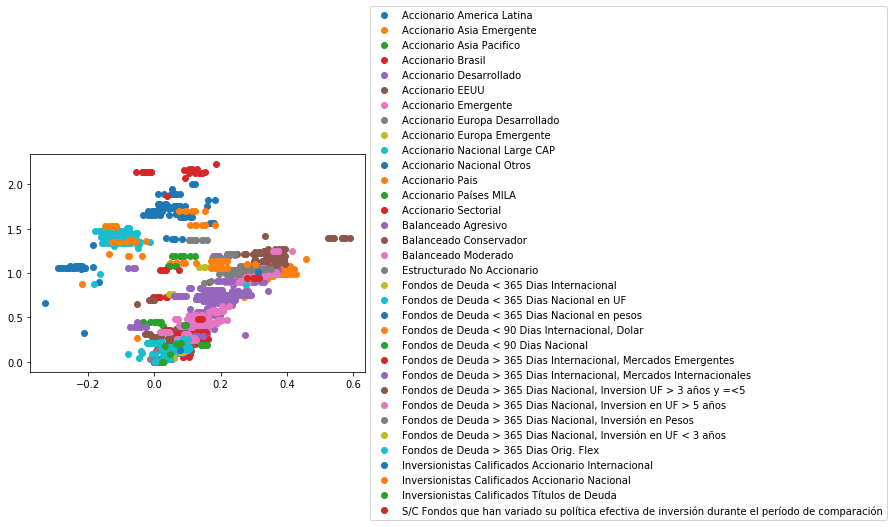

In [5]:
#visualize the different type of funds aafm
groups=data_final.groupby('aafmCategory')
for name, group in groups:
    plt.plot(group['mean_return']*100, group['mean_std']*100, marker="o", linestyle="", label=name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Number of Funds by svsclassification

In [6]:
data_final.groupby(['svsCategory','currency']).count().sort_values(by=['currency','riskadj_ratio'], ascending=False)['riskadj_ratio']

svsCategory                                                 currency
FM DE LIBRE INVERSION                                       P           703
FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION           P           462
FM DE INV.EN INST.DE DEUDA DE MEDIANO Y LARGO PLAZO         P           359
FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION <= 90 DIAS   P           167
FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION <= 365 DIAS  P           130
FM MIXTO                                                    P           124
FM DIRIGIDO A INVERSIONISTAS CALIFICADOS                    P            29
FM ESTRUCTURADO                                             P             5
FM DE LIBRE INVERSION                                       D            83
FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION <= 90 DIAS   D            40
FM DE INV.EN INST.DE DEUDA DE MEDIANO Y LARGO PLAZO         D            37
FM MIXTO                                                    D            34
FM DE INVERSION EN 

#### SVS Category: Average Return/Std

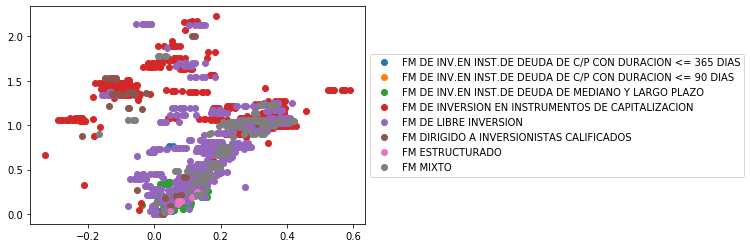

In [7]:
#visualize the different type of funds aafm
groups=data_final.groupby('svsCategory')
for name, group in groups:
    plt.plot(group['mean_return']*100, group['mean_std']*100, marker="o", linestyle="", label=name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### KNN Classification Algorithm

In [116]:
#Calculate monthly returnschange 
data_return=pd.DataFrame(data_ts_r2.rolling(4).mean().loc['2021-02-03':'2021-02-08'].T.values,index=data_ts_r2.rolling(4).mean().loc['2021-02-03':'2021-02-08'].T.index,columns=['r1','r2','r3','r4','r5','r6'])
data_std=pd.DataFrame(data_ts_std2.rolling(4).mean().loc['2021-02-03':'2021-02-08'].T.values,index=data_ts_std2.rolling(4).mean().loc['2021-02-03':'2021-02-08'].T.index,columns=['s1','s2','s3','s4','s5','s6'])
data_knn=round(data_return.join(data_std).join(data_info['aafmCategory']),8).dropna(axis='rows')
data_knn.head()

,r1,r2,r3,r4,r5,r6,s1,s2,s3,s4,s5,s6,aafmCategory
runserie,,,,,,,,,,,,,
8011-K100,-0.000083,-0.000025,0.000105,0.000222,0.000304,0.000455,0.000143,0.000142,0.000155,0.00017,0.000172,0.000196,Fondos de Deuda < 90 Dias Nacional
8011-KB,-0.000153,-0.000094,0.000036,0.000153,0.000235,0.000386,0.000143,0.000142,0.000155,0.00017,0.000172,0.000196,Fondos de Deuda < 90 Dias Nacional
8011-KC,-0.000118,-0.000060,0.000070,0.000188,0.000269,0.000420,0.000143,0.000142,0.000155,0.00017,0.000172,0.000196,Fondos de Deuda < 90 Dias Nacional
8011-KCASH,-0.000157,-0.000098,0.000032,0.000149,0.000231,0.000381,0.000143,0.000142,0.000155,0.00017,0.000172,0.000196,Fondos de Deuda < 90 Dias Nacional
8011-KG,-0.000194,-0.000136,-0.000006,0.000112,0.000193,0.000344,0.000143,0.000142,0.000155,0.00017,0.000172,0.000196,Fondos de Deuda < 90 Dias Nacional


In [96]:
#Features data_knn columns-1, last column is the target label
from sklearn import preprocessing
# Converting string labels into numbers.
#creating labelEncoder
le = preprocessing.LabelEncoder()
label=le.fit_transform(data_knn['aafmCategory'])
#features list
features=[]
for i in range(0,len(data_knn.loc[:, data_knn.columns != 'aafmCategory'])):
    (a,b,c,d,e,f,g,d,e,w,t,y)=data_knn.loc[:, data_knn.columns != 'aafmCategory'].iloc[i].astype(float)
    features.append((a,b,c,d,e,f,g,d,e,w,t,y))



In [132]:
#LABEL DETAILS.
label_unique=pd.DataFrame(label)[0].unique()
ids=pd.DataFrame(label_unique,columns=['IDLABEL'])
ids['aafm_name']=data_knn['aafmCategory'].unique()
ids.sort_values('IDLABEL')

,IDLABEL,aafm_name
12,0,Accionario America Latina
15,1,Accionario Asia Emergente
14,2,Accionario Asia Pacifico
25,3,Accionario Brasil
10,4,Accionario Desarrollado
9,5,Accionario EEUU
6,6,Accionario Emergente
11,7,Accionario Europa Desarrollado
29,8,Accionario Europa Emergente
4,9,Accionario Nacional Large CAP


In [139]:
#type the variables and it will classify your model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
model.fit(features,label)
#Predict Output, input variables
predicted= model.predict([[10,10,10,10,10,10,0,0,0,0,0,0]])
print(predicted)

[11]


In [115]:
#trainning set accuracy
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_knn.loc[:, data_knn.columns != 'aafmCategory'].astype(float), label, test_size=0.3) # 70% training and 30% test
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8474320241691843


In [135]:
sum(y_test==y_pred)/len(y_pred)

0.8474320241691843